In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

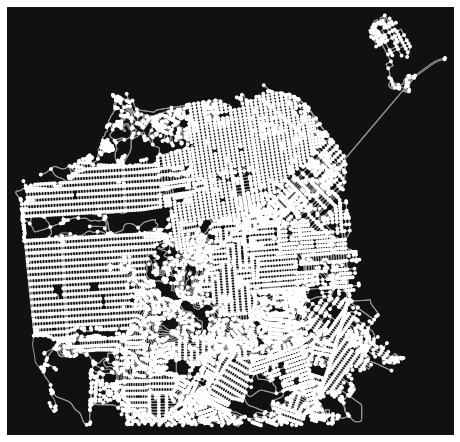

In [64]:
# G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
# G = ox.graph_from_place("Founex, Switzerland", network_type="drive")
G = ox.graph_from_place("San Francisco, California, USA", network_type="drive")
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)
fig, ax = ox.plot_graph(G)
fig.savefig("data/founex")

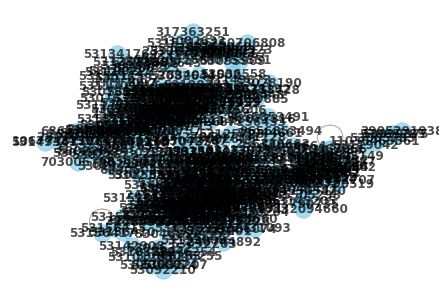

In [3]:
graph = nx.Graph(G)
pos = nx.spring_layout(graph)  # You can choose different layout algorithms
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
plt.show()

In [51]:
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)# get the nearest network nodes to two lat/lng points with the distance module

orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)
orig = rng.choice(G.nodes, 2)
dest = rng.choice(G.nodes, 2)
# orig = 703006798
# dest = 53126347
print(orig, dest)



[6982135025 6480217087] [ 256021767 1199537213]


[6982135025, 6524910917, 6982135024, 977989782, 280886176, 2530669258, 2534810054, 2534810060, 2530669179, 280886179, 256021588, 256021590, 2530669193, 256021594, 256021596, 256021767]


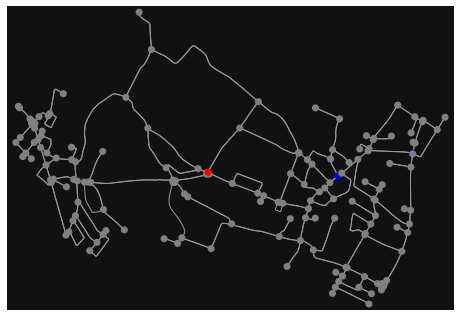

In [56]:
# find the shortest path between nodes, minimizing travel time, then plot it
routes = ox.shortest_path(G, 6982135025, 256021767, weight="travel_time")
print(routes)
# time = nx.shortest_path_length(G, orig, dest, weight="travel_time")
rc = ['r', 'y', 'c']
rc = ['g', 'y', 'r', 'c']
rc = ['c']
# fig, ax = ox.plot_graph_route(G, routes, route_color='c', node_size=0)
def col(r):
	if r == 6982135025:
		return 'r'
	elif r in dest:
		return 'b'
	else:
		return 'grey'
nc = [col(node) for node in G.nodes]
fig, ax = ox.plot_graph(G, node_color=nc, node_size = 50)
fig.savefig("data/founex_nodes.png")
# fig, ax = ox.plot_graph_routes(G, routes, node_size=0, route_colors=rc)

In [34]:
G.nodes

NodeView((53017091, 53018397, 53018399, 53018402, 53018404, 53018410, 53018411, 53021742, 53021743, 53021750, 53022623, 53022625, 53023513, 53025057, 53025060, 53025220, 53025222, 53027454, 53027455, 53027457, 53027459, 53027461, 53027463, 53028190, 53028192, 53033660, 53035698, 53035699, 53036557, 53036558, 53037306, 53037307, 53040495, 53040794, 53041432, 53041437, 53041440, 53041442, 53041443, 53041445, 53041668, 53041670, 53042706, 53042707, 53044573, 53044575, 53044661, 53044664, 53046249, 53046250, 53046251, 53046252, 53046253, 53046254, 53046255, 53050874, 53050875, 53057697, 53059166, 53059173, 53059175, 53059186, 53059187, 53059189, 53059885, 53060462, 53060465, 53060466, 53060467, 53060468, 53060469, 53060471, 53060473, 53062956, 53062958, 53064300, 53064302, 53064305, 53064327, 53064328, 53064330, 53064331, 53065783, 53065785, 53066716, 53066717, 53068822, 53068826, 53068829, 53073689, 53073691, 53073816, 53073822, 53073843, 53074376, 53074377, 53074380, 53075311, 53075599, 

In [81]:
for a, b in zip(orig, dest):
	routes = nx.shortest_path_length(G, a, b, weight="travel_time")
	print(routes)

238.60000000000002
245.0
150.6


In [83]:
for a, b in zip(orig, dest):
	routes = nx.shortest_path_length(G, a, weight="travel_time")
	print(routes[b])

238.60000000000002
245.0
150.6


In [65]:
%%time
from instance_generator import _sample_osmnx_graph
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)# get the nearest network nodes to two lat/lng points with the distance module
kwargs = {
	'location_graph': G,
	'ret_routes': True
}
# matrix, routes = _sample_osmnx_graph(8, 8, rng, **kwargs)
matrix, routes = _sample_osmnx_graph(4, 4, rng, **kwargs)

CPU times: user 1.08 s, sys: 15.5 ms, total: 1.1 s
Wall time: 1.1 s


16


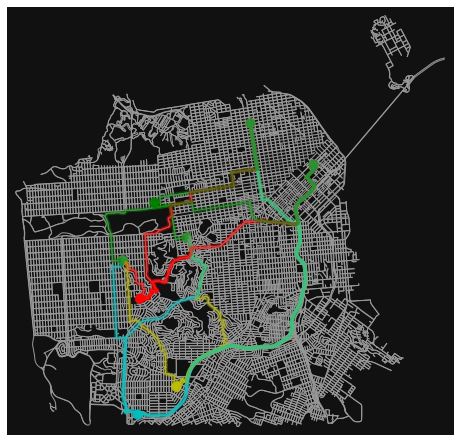

In [67]:
# rc = ['r', 'y', 'c'] * 2
rc = ['r', 'y', 'c', 'g'] * 4
print(len(routes))
fig, ax = ox.plot_graph_routes(G, routes, node_size=0, route_colors=rc)
fig.savefig("data/sf_routes.png")

In [24]:
matrix

array([  0. ,   0. , 415.2])

In [ ]:
mat = np.array